In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


#IMPORT OWN FILES
import sys
sys.path.append(r"Code") # append folder "/Code" to our path"

#own files
import forces as fc
import molecules as mc
import util

## Setup universe

In [2]:
#force function
threshold = 0.1
def custom_force1(m1,m2):
  f = fc.total_force_molecule(m1,m2, threshold = threshold)
  return f 

In [3]:
# Parameters for universe initialization
box_const_size = 8000   #nm (x,y)
microscope_z_dim = 1000 #nm
box_size = np.array([box_const_size,box_const_size,microscope_z_dim]) #max coordinate values for universe
num_steps = 1_000_000 #num steps

max_stepsize = 9      # +- maximum stepsize for x,y and z
mc.MAX_TRANSLATE = max_stepsize
#fc.SIGMA = 0.006 * (1-cull) #used to set culling percentage (by default 0.75)

num_molecules = 479
seed = 1417  #Used both for radius and universe

radii  = util.get_n_radii(num_molecules,seed=seed) #generate radii
force_func = custom_force1 #force function for simulation

uni = mc.SimpleUniverse(box_size, num_molecules,radii,seed, force_fun = force_func)
print("spawned universe of type:", type(uni.molecules[0].pos[0]))

spawned universe of type: <class 'numpy.float64'>


In [4]:
#num_molecules | box_size:

#to get 13% volume fraction:
#64,8  (2000,2000,1000)
#145,8 (3000,3000,1000)
#259   (4000,4000,1000)
#405   (5000,5000,1000)
#1037  (8000,8000,1000)

#to get 10% volume fraction:
#50    (2000,2000,1000)
#199   (4000,4000,1000)
#311   (5000,5000,1000)
#797   (8000,8000,1000)

#to get 6% volume fraction:
#479  (8000,8000,1000)
#187  (5000,5000,1000)
#109  (4000,4000,1000)
#30   (2000,2000,1000)

## Show force and density

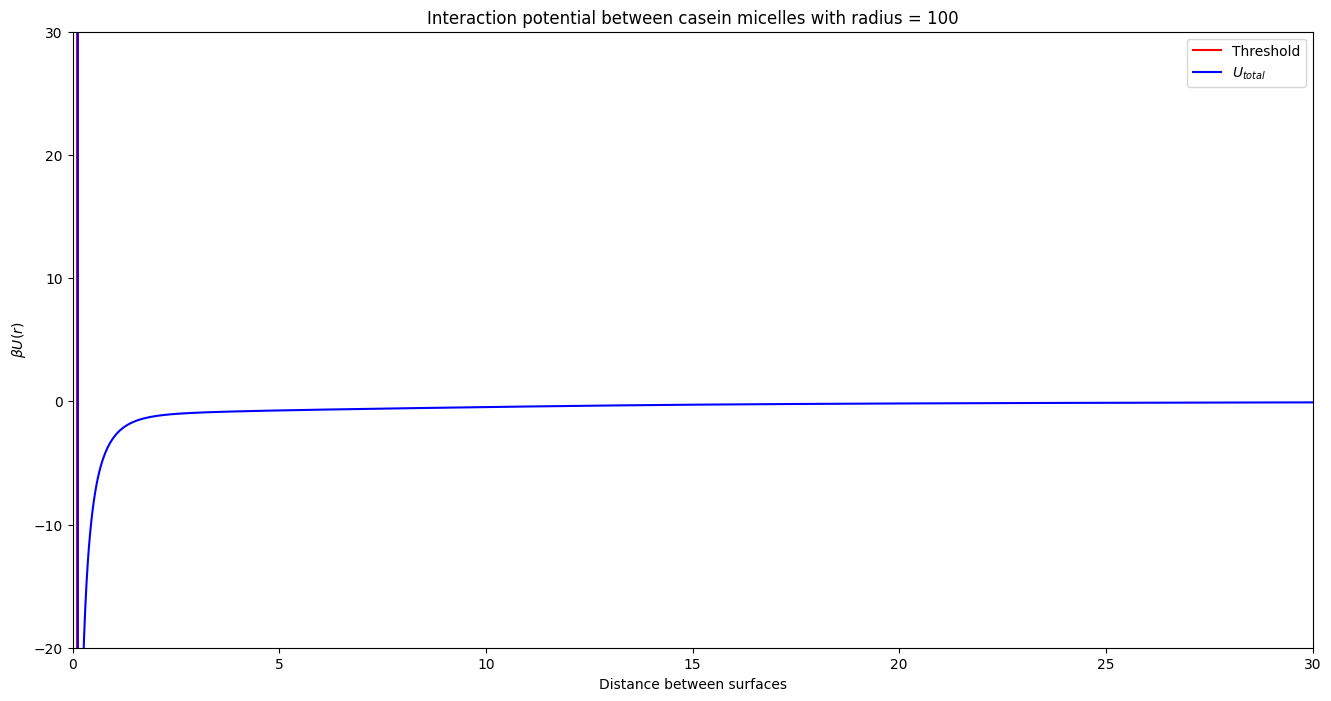

In [5]:
#plot force between two molecules:
radius = 100 #only used for plotting purposses

#spawn two molecules at different distances
interdists = np.linspace(0.1,30,1000)
forces = []
for i in interdists:
  dist_between = 2*radius + i
  m1 = mc.Molecule(np.array([0.0,0.0,0.0]),radius)
  m2 = mc.Molecule(np.array([dist_between,0.0,0.0]),radius)
  f = force_func(m1,m2)
  forces.append(f)

plt.figure(figsize=(16,8))

plt.axvline(x=threshold,label = "Threshold",c="red")
plt.plot(interdists, forces, c="blue", label = "$U_{total}$")

plt.ylim((-20,30))
plt.xlim((0,30))
plt.title(f"Interaction potential between casein micelles with radius = {radius}")
plt.xlabel("Distance between surfaces")
plt.ylabel(r"$\beta U(r)$")
plt.legend()
plt.show()



In [6]:
#see density
box_vol = int(box_size[0])*int(box_size[1])*int(box_size[2])
sphere_vol = 0
for r in radii:
  sphere_vol += ((4/3)*r**3*np.pi)


print("Density: ", sphere_vol/box_vol)

Density:  0.06291021552164723


## Run Simulation

In [7]:
#run univers # steps
points = []
_, radii = uni.get_state(with_radius= True)

# Perform Simulation
for i in tqdm(range(num_steps)):
  #randomly select a molecule
  uni.make_step()
  #store intermediate results?
  points.append(uni.get_state())

acc, rej, accs, num = uni.get_stats()
print(f"Accepted: {acc}, Rejected: {rej}, Rate: {acc/num}")

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:10<00:00, 98.67it/s]

Accepted: 965, Rejected: 35, Rate: 0.965


## Saving

In [8]:
#store every x points
frame_step_size = 1000
frame_nums = [i for i in range(0,num_steps,frame_step_size)]
point_frames = [points[frame] for frame in frame_nums]

In [9]:
#save simulation
name = ""
save_space = True


if save_space:
  name = mc.save_molecule_steps(point_frames,radii,accs, box_const_size,seed,frame_step_size,max_stepsize)
else:
  name = mc.save_molecule_steps(points,radii, accs,box_const_size,seed,1,max_stepsize)

print(name)

simV3R_1_8000_1417_9_1000_beafa.npy
